In [1]:
%matplotlib inline
import argparse
import os, sys
import json
from itertools import izip
from common.plot_fcns import *
import numpy as np
import pandas as pd
from common.h5py_data_loader import H5pyDataLoader

In [2]:
data_save_base = get_env_var("DATA_SAVE_BASE")
data_dir="{}/20180525_DM_scrubbing/train_data/".format(data_save_base)
hdf5_train="{}train_ts2012_chembl20_MWmax800_scrubDM_minpos10_cutoff5.hdf5".format(data_dir)
target_map_file="{}ts2012_chembl20_MWmax800_scrubDM_minpos10_cutoff5_target_index.pkl".format(data_dir)


In [3]:
# this is where we store our 
# network_script_fmter = 
# if network_script_fmter is None:
#     network_script_fmter = "{}/labgits/neural-nets/experiments/{}.py".format(get_env_var("HOME"), "{}")

train_dl = H5pyDataLoader(hdf5_file=hdf5_train,
                          target_map_file=target_map_file, 
                          train_percentage=None, 
                          multitask=True)

train_dl.load_training_data()

In [4]:
ctr = 0 
for x,y,idxes in train_dl.iterate_minibatches(shuffle=False, indices=None,stochastic_negatives=False):
    if ctr >= 500:
        break
    ctr += 1

/srv/home/ecaceres/labgits/neural-nets/common/h5py_loading.py:200: RuntimeWarning: invalid value encountered in greater
  y_row, act_col = np.where(act_arr[excerpt] > 0.)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
y_mask = y==0.

In [7]:
train_dl2 = H5pyDataLoader(hdf5_file=hdf5_train,
                          target_map_file=target_map_file, 
                          train_percentage=None, negative_threshold=5.0,
                          multitask=True, stochastic_negatives=True, positive_negative_ratio=1.0
                          )

train_dl2.load_training_data()

In [8]:
for x2,y2,idxes2 in train_dl2.iterate_minibatches(shuffle=False, indices=idxes, stochastic_negatives=True):
    break

/srv/home/ecaceres/labgits/neural-nets/common/h5py_data_loader.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.random_state.uniform(size=size, low=self.low, high=self.high)
/srv/home/ecaceres/labgits/neural-nets/common/h5py_data_loader.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.random_state.uniform(size=size, low=self.low, high=self.high)
/srv/home/ecaceres/labgits/neural-nets/common/h5py_data_loader.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.random_state.uniform(size=size, low=self.low, high=self.high)
/srv/home/ecaceres/labgits/neural-nets/common/h5py_data_loader.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.random_state.uniform(s

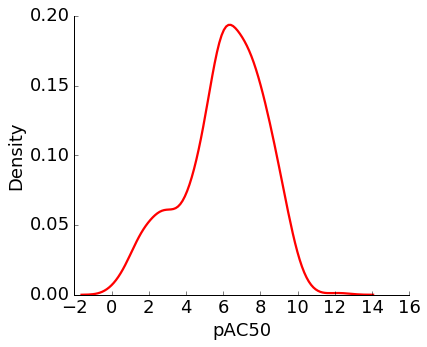

In [9]:
fig, ax = plt.subplots(figsize=(6,5))
sns.set_context("talk")
sns.distplot(y[~y_mask], hist=False, color="r")
plt.xlabel("pAC50")
plt.ylabel("Density")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


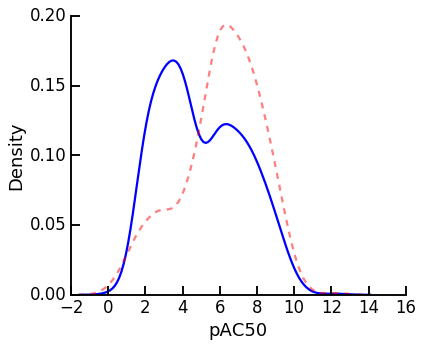

In [12]:
y2_mask = y2==0.
fig, ax = plt.subplots(figsize=(6,5))
sns.set_context("talk")
sns.distplot(y2[~y2_mask], hist=False, color="b")
sns.distplot(y[~y_mask], hist=False, color="r", kde_kws={"ls":"--", "alpha":0.5})
plt.xlabel("pAC50")
plt.ylabel("Density")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


0 bad
1 fine
2 bad
3 fine
4 fine
5 fine
500 